# The Observer Pattern

### Problem

Let's consider Stock market updates: in a trading application, multiple traders may be interested in receiving updates about the prices of different stocks.

The trader could visit the website every day and check different stocks. But while the stocks are still with the same price, most of these "trips" would be pointless.

In the context of a game apps, this could be an issue as well. 

You need to notify different game components (such as scoreboards, health bars, etc.) when the game's state changes (such as when the player collects a power-up or takes damage).

**Goal**:
* Define a one-to-many dependency between objects so that when one object changes state, all its dependents are notified and updated automatically.

### Solution

The **Observer** pattern is a design pattern that allows `objects` to be notified of changes to the state of another object, called the "`subject`."

This pattern is commonly used in user interfaces, distributed systems, and event-driven systems where the state of an object changes frequently.

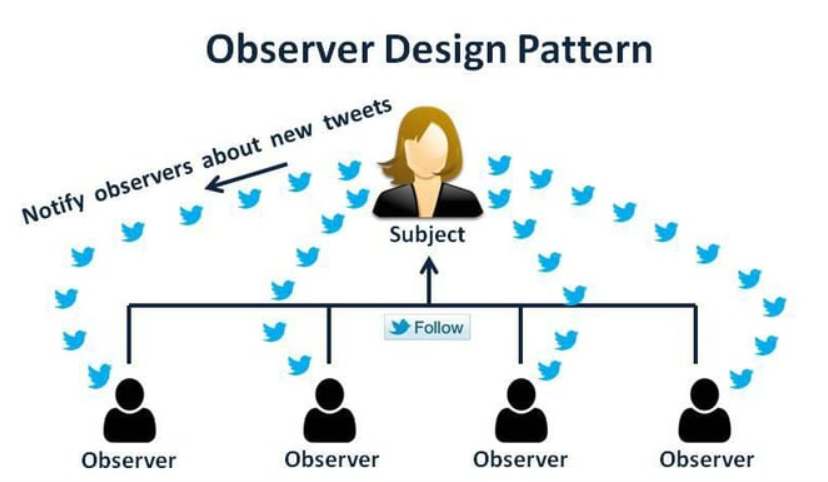

**Key Components**:

**Publisher**: Manages events triggered by changes in its state or behavior, incorporating a subscription infrastructure for subscriber management.

**Subscriber Interface**: Declares the notification interface, typically including an update method to receive event details from the publisher.

**Concrete Subscribers**: Implements specific actions in response to notifications issued by the publisher, ensuring adherence to a uniform interface for decoupling.

**Client**: Creates instances of publishers and subscribers independently and orchestrates the subscription of subscribers to publishers for updates.


### UML Class Diagram

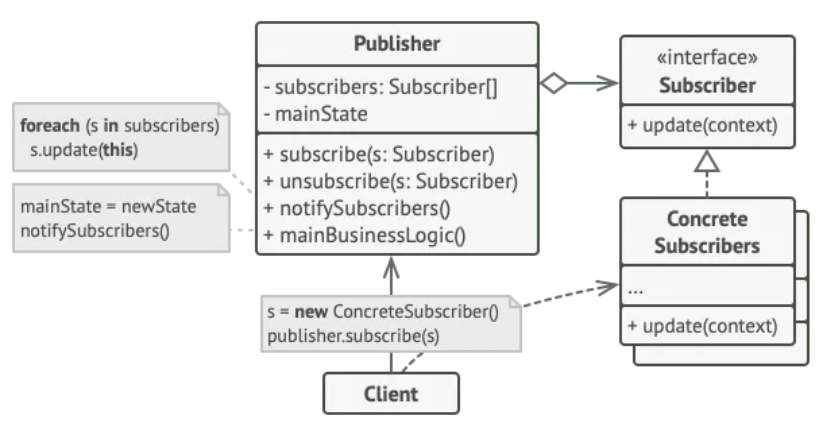

The object that has some interesting state is often called subject, but since it’s also going to notify other objects about the changes to its state, we’ll call it `publisher`. 

All other objects that want to track changes to the publisher’s state are called `subscribers`.

The Observer pattern suggests that you add a `subscription mechanism` to the publisher class so individual objects can subscribe to or unsubscribe from a stream of events coming from that publisher. 

The `Subject (Publisher)` maintains a `list of Observers (subscription) `and notifies them of changes in its state. 

The Observer subscribes to the Subject and receives notifications when the state of the Subject changes.

Whenever an important event happens to the `publisher`, it *goes over its subscribers and calls the specific notification method on their objects*

Note:
* subscribers need some contextual information to handle the update correctly. 
* for this reason, publishers often pass some context data as arguments of the notification method.
* the publisher can pass itself as an argument, letting subscriber fetch any required data directly.

### Example 1 - an abstract implementation 

In [1]:
from abc import ABC, abstractmethod

In [4]:
class Subject:
    def __init__(self):
        self.__observers = set()
        self.__subject_state = None

    def attach(self, observer):
        observer.subject = self
        self.__observers.add(observer)

    def detach(self, observer):
        observer.subject = None
        self.__observers.discard(observer)

    def __notify(self):
        for observer in self.__observers:
            observer.update(self.__subject_state)
            
    @property
    def subject_state(self):
        return self.__subject_state

    @subject_state.setter
    def subject_state(self, arg):
        self.__subject_state = arg
        self.__notify()

In [7]:
class Observer(ABC):

    def __init__(self):
        self.__subject = None
        self.__observer_state = None
        
    @property
    def subject(self):
        return self.__subject
    
    @subject.setter
    def subject(self, value):
        self.__subject=value
        
    @property
    def observer_state(self):
        return self.__observer_state
    
    @observer_state.setter
    def observer_state(self, value):
        self.__observer_state=value

    @abstractmethod
    def update(self, arg):
        pass

In [8]:
class ConcreteObserver(Observer):

    def update(self, arg):
        print(f"I am updating my state {self.observer_state} with a new one {arg}")
        self.observer_state = arg

In [ ]:
#client code
